In [1]:
import pandas as pd
import pandas_datareader.data as web

import datetime

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is to make our graph in line

%matplotlib inline

In [3]:
# Once the display.max_rows() is exceeded, 
# the display.min_rows() options determines how many rows are shown in the shortened representation.

pd.set_option("max_rows", 10)
pd.set_option("min_rows", 8)

In [15]:
# These are the settings for graphing

pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 80)
pd.set_option("precision", 3)

# 2:

In [16]:
# Let's make our date range of our data by defining start date and end date

start = datetime.date(2017, 9, 1)
end = datetime.date(2020, 8, 30)

In [17]:
# Let's harvest tesla data from yahoo, then input the start and end to indicate the data range to harvest

tesla = web.DataReader("TSLA", "yahoo", start, end)
tesla.head()

              High     Low    Open   Close    Volume  Adj Close
Date                                                           
2017-08-31  71.688  70.564  70.710  71.180  20364000     71.180
2017-09-01  71.518  70.738  71.224  71.080  15247500     71.080
2017-09-05  71.098  69.178  70.760  69.918  19175500     69.918
2017-09-06  70.196  68.312  69.900  68.906  20457000     68.906
2017-09-07  70.496  68.690  69.196  70.122  21196000     70.122

In [31]:
# Now, let's define the get function 

def get(tickers, start, end):
    
# Now, we define what is data
    def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
    
    stocks = map(data, tickers)
    
    return pd.concat(stocks, keys = tickers, names = ["Ticker", "Date"])

In [43]:
# Now, we define what is tickers in side get() function that we define previously

tickers = ["AAPL", "MSFT", "NFLX", "FB", "BA", "UAL", "GS", "JPM"]

In [44]:
# Using the get() function we just define and the tikers variable we define
# We can now use the get function to get the tickers data in the get funtion

stock8 = get(tickers, start, end)
stock8

                      High      Low     Open    Close     Volume  Adj Close
Ticker Date                                                                
AAPL   2017-08-31   41.130   40.870   40.910   41.000  1.071e+08     39.381
       2017-09-01   41.235   40.908   41.200   41.013  6.636e+07     39.393
       2017-09-05   41.062   40.140   40.938   40.520  1.179e+08     38.920
       2017-09-06   40.748   40.130   40.678   40.478  8.661e+07     38.880
...                    ...      ...      ...      ...        ...        ...
JPM    2020-08-25  101.980   99.800  101.270  100.500  1.365e+07    100.500
       2020-08-26  100.270   99.050   99.940   99.090  1.205e+07     99.090
       2020-08-27  102.650   99.000   99.000  102.350  2.216e+07    102.350
       2020-08-28  103.250  101.810  103.140  102.770  1.375e+07    102.770

[6032 rows x 6 columns]

In [40]:
# Now, let's obtain SPY data from yahoo.

sp500_df = web.DataReader("SPY", "yahoo", start, end).reset_index()
# .reset_index() is to reset the index to make everything columns

sp500_df

          Date    High     Low    Open   Close     Volume  Adj Close
0   2017-08-31  247.77  246.05  246.72  247.49  1.038e+08    233.572
1   2017-09-01  248.33  247.67  247.92  247.84  6.201e+07    233.903
2   2017-09-05  247.52  244.95  247.26  246.06  9.140e+07    232.223
3   2017-09-06  247.28  246.23  246.84  246.90  5.792e+07    233.016
..         ...     ...     ...     ...     ...        ...        ...
750 2020-08-25  344.21  342.27  343.53  344.12  3.846e+07    344.120
751 2020-08-26  347.86  344.17  344.76  347.57  5.079e+07    347.570
752 2020-08-27  349.90  346.53  348.51  348.33  5.803e+07    348.330
753 2020-08-28  350.72  348.15  349.44  350.58  4.851e+07    350.580

[754 rows x 7 columns]

In [48]:
# Now, we just want the closing prices of all the stocks in stock8

closing_prices = stock8[["Adj Close"]].reset_index()
closing_prices.head()

  Ticker       Date  Adj Close
0   AAPL 2017-08-31     39.381
1   AAPL 2017-09-01     39.393
2   AAPL 2017-09-05     38.920
3   AAPL 2017-09-06     38.880
4   AAPL 2017-09-07     38.723

In [49]:
# Now, we use pivot function to pivot the data from a list into a columns

daily_close_px = closing_prices.pivot("Date", "Ticker", "Adj Close")
daily_close_px.head()

Ticker        AAPL       BA      FB       GS     JPM    MSFT    NFLX    UAL
Date                                                                       
2017-08-31  39.381  227.173  171.97  211.642  83.429  71.496  174.71  61.96
2017-09-01  39.393  227.808  172.02  213.666  84.172  70.702  174.74  62.43
2017-09-05  38.920  224.652  170.72  206.004  82.162  70.387  174.52  61.10
2017-09-06  38.880  222.396  172.09  206.998  82.713  70.186  179.25  60.33
2017-09-07  38.723  223.998  173.21  204.169  81.262  71.085  179.00  58.58

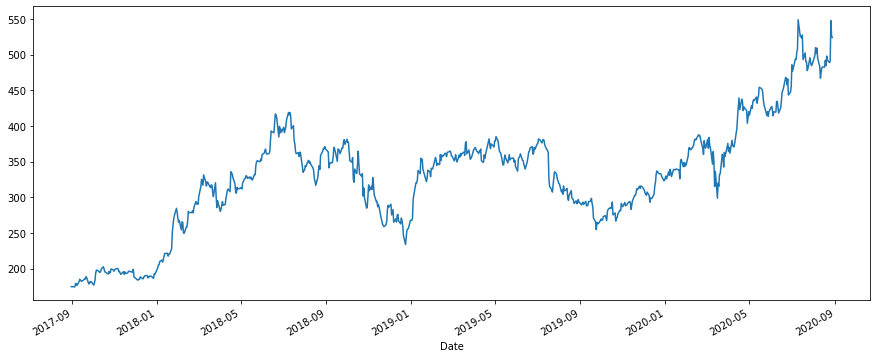

In [50]:
# Now, we can plot the daily close price of Netflix

daily_close_px["NFLX"].plot(figsize = (15, 6))

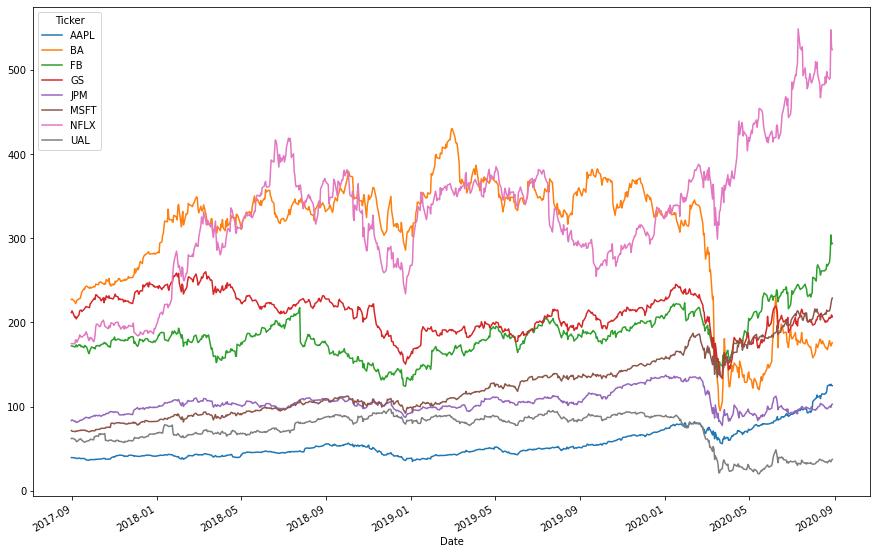

In [51]:
# Now, we can visualise the daily closing price of all stocks in one graph

daily_close_px.plot(figsize = (15, 10))

# Let's save this file
plt.savefig("stocks.png", bbox_inches = "tight", dpi = 300)

In [52]:
fb_v = stock8.Volume.loc["FB"]

<BarContainer object of 754 artists>

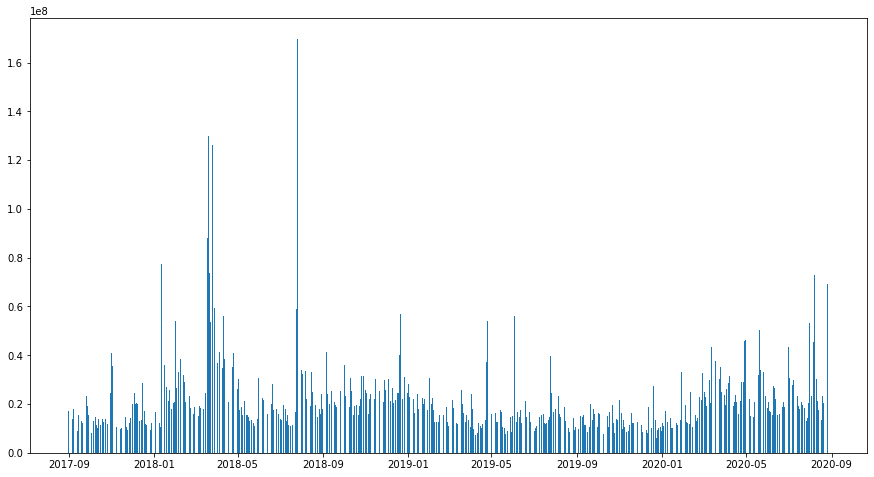

In [53]:
f, ax = plt.subplots(figsize = (15, 8))
plt.bar(fb_v.index, fb_v)

In [55]:
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [57]:
sp500_df

          Date    High     Low    Open   Close     Volume  Adj Close
0   2017-08-31  247.77  246.05  246.72  247.49  1.038e+08    233.572
1   2017-09-01  248.33  247.67  247.92  247.84  6.201e+07    233.903
2   2017-09-05  247.52  244.95  247.26  246.06  9.140e+07    232.223
3   2017-09-06  247.28  246.23  246.84  246.90  5.792e+07    233.016
..         ...     ...     ...     ...     ...        ...        ...
750 2020-08-25  344.21  342.27  343.53  344.12  3.846e+07    344.120
751 2020-08-26  347.86  344.17  344.76  347.57  5.079e+07    347.570
752 2020-08-27  349.90  346.53  348.51  348.33  5.803e+07    348.330
753 2020-08-28  350.72  348.15  349.44  350.58  4.851e+07    350.580

[754 rows x 7 columns]

In [62]:
# Now, we want create something interactive to viualise the chart
# We use go.Scatter to plot interactive scatter, 
# That when your mouse is on the scatter points, it will show you the data
# Define the x and y axis


closing_sp500 = go.Scatter(x = sp500_df.Date, y = sp500_df.Close)

# Let's use go.Figure to show it
go.Figure(closing_sp500)

In [64]:
# If you want to visualise the data using candlestick, we can do that by:

candlestick = [go.Candlestick(x = sp500_df.Date,
                                  open = sp500_df.Open,   # We have to define what is in the candlestick
                                  high = sp500_df.High,
                                  low = sp500_df.Low,
                                  close = sp500_df.Close)]

# If you want the remove the range slider at the bottom, you can remove it by:
# fig.update_layout(xaxis_rangeslider_visible = False)

go.Figure(candlestick)

In [69]:
# Now, we want to produce the data for Netflix only
# We uses .loc function to find NFLX because it is in index so we need to locate it, it is not in the column

netflix_df = stock8.loc["NFLX"].reset_index()
# .reset_index() is to reset the index to make everything columns

netflix_df

          Date    High     Low    Open   Close     Volume  Adj Close
0   2017-08-31  176.24  173.86  175.45  174.71  6.941e+06     174.71
1   2017-09-01  176.48  173.92  175.55  174.74  3.813e+06     174.74
2   2017-09-05  175.88  172.44  173.40  174.52  4.590e+06     174.52
3   2017-09-06  179.46  173.73  175.25  179.25  8.743e+06     179.25
..         ...     ...     ...     ...     ...        ...        ...
750 2020-08-25  492.47  485.09  488.19  490.58  5.728e+06     490.58
751 2020-08-26  549.04  492.08  492.50  547.53  2.037e+07     547.53
752 2020-08-27  541.00  521.25  537.78  526.27  9.063e+06     526.27
753 2020-08-28  539.00  522.00  532.00  523.89  4.415e+06     523.89

[754 rows x 7 columns]

In [89]:
# Now, we want to visualise the SPY and Netflix data
# To do that, we need to define the netflix_sp500, and include both variables as a list:

netflix_sp500 = [go.Scatter(x = sp500_df.Date, y = sp500_df.Close, name = "S&P 500"),
              go.Scatter(x = netflix_df.Date, y = netflix_df.Close, name = "Netflix")]

In [98]:
# We want to make a even more interactive chart

# We define our updatemenu button and data location sourcing as updatemenus
updatemenus = list([
    dict(active = -1, # This means without clicking on the graph, by hovering your mouse on the graph, it will show
         buttons = list([ # "Buttons" is a list of dictionaries 
             dict(label = "sp500_df", # This is where you locate your data to show
                  method = "update",
                  args = [{"visible": [True, False]}, # The "True" "False" here are unique index for the buttons to locate
                          {"title": "S&P 500"}]),
             dict(label = "netflix_df",
                  method = "update",
                  args = [{"visible": [False, True]},
                          {"title": "Netflix"}]),
             dict(label = "sp500_df + netflix_df",
                  method = "update",
                  args = [{"visible": [True, True]},
                          {"title": "S&P 500 versus Netflix"}])
         ]),
        )
])

# We define the layout as layout_ where you include updatemenu and titles

layout_ = dict(title = "Yahoo! Finance", updatemenus = updatemenus) # This is where you include the "buttons."

# This is where you define your figure and include the data to source your figure
figure = dict(data = netflix_sp500, layout = layout_) # This is where you input your data to show

go.Figure(figure)

In [101]:
# Now, we want make a chart for growth since day 1 for SPY and Netflix
# We do this by define the netflix_sp500_growth, and include both variables as a list:

netflix_sp500_growth = [go.Scatter(x = sp500_df.Date, y = sp500_df.Close/sp500_df.iloc[0]["Close"], name = "S&P 500"),
                     go.Scatter(x = netflix_df.Date, y = netflix_df.Close/netflix_df.iloc[0]["Close"], name = "NFLX")]

# You would use iloc function to locate integer row [0] to calculate growth

In [102]:
# Now, we want to show the new data we have, netflix_sp500_growth

layout2 = dict(title = "Yahoo! Finance", showlegend = True, updatemenus = updatemenus)

figure2 = dict(data = netflix_sp500_growth, layout = layout2)
go.Figure(figure2)

# 3:

In [111]:
# Now, we want to calculate the daily percentage change
# We first, let's see the daily close price

daily_close_px

Ticker         AAPL       BA      FB       GS      JPM     MSFT    NFLX    UAL
Date                                                                          
2017-08-31   39.381  227.173  171.97  211.642   83.429   71.496  174.71  61.96
2017-09-01   39.393  227.808  172.02  213.666   84.172   70.702  174.74  62.43
2017-09-05   38.920  224.652  170.72  206.004   82.162   70.387  174.52  61.10
2017-09-06   38.880  222.396  172.09  206.998   82.713   70.186  179.25  60.33
...             ...      ...     ...      ...      ...      ...     ...    ...
2020-08-25  124.825  174.730  280.82  204.760  100.500  216.470  490.58  35.22
2020-08-26  126.522  171.900  303.91  205.973   99.090  221.150  547.53  34.25
2020-08-27  125.010  174.200  293.22  208.885  102.350  226.580  526.27  36.22
2020-08-28  124.808  175.800  293.66  206.460  102.770  228.910  523.89  37.34

[754 rows x 8 columns]

In [113]:
# Now, let's take apple close price and work some simple math to calculate it's daily reutrn in percentage

apple_p_t0 = daily_close_px.iloc[0]["AAPL"] # This is Pt-1
apple_p_t1 = daily_close_px.iloc[1]["AAPL"] # This is Pt
# To calculate returns, Pt - Pt-1
r_t1 = apple_p_t1 / apple_p_t0 - 1 # -1 to get only the difference (growth)

# Let's see them
apple_p_t0, apple_p_t1, r_t1

(39.38139724731445, 39.393409729003906, 0.00030502934200171694)

In [129]:
# Remember, [Row: Row], thus
# Daily close price integer location for second row to end
# Divide by daily close price integer location for all the rows 

dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values - 1  # -1 to get only the difference (growth)

# Take data in location for all the rows, take column from AAPL to UAL
dpc_1.loc[:,"AAPL":"UAL"]

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
2017-09-07 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013 -1.395e-03 -0.029
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[753 rows x 8 columns]

In [135]:
# Let's examine why do we need to use .values in daily_close_px.iloc[:-1].values
# dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values - 1

# Let's look at them individually
a = daily_close_px.iloc[1:]
b = daily_close_px.iloc[:-1].values
print(a); print(b)

# .values make the data into values, thus making them into numbers and will be sorted in a list
# We have to use a formated dataframe to look up to a list to do calculation and return it with the formated dataframe

Ticker         AAPL       BA      FB       GS      JPM     MSFT    NFLX    UAL
Date                                                                          
2017-09-01   39.393  227.808  172.02  213.666   84.172   70.702  174.74  62.43
2017-09-05   38.920  224.652  170.72  206.004   82.162   70.387  174.52  61.10
2017-09-06   38.880  222.396  172.09  206.998   82.713   70.186  179.25  60.33
2017-09-07   38.723  223.998  173.21  204.169   81.262   71.085  179.00  58.58
...             ...      ...     ...      ...      ...      ...     ...    ...
2020-08-25  124.825  174.730  280.82  204.760  100.500  216.470  490.58  35.22
2020-08-26  126.522  171.900  303.91  205.973   99.090  221.150  547.53  34.25
2020-08-27  125.010  174.200  293.22  208.885  102.350  226.580  526.27  36.22
2020-08-28  124.808  175.800  293.66  206.460  102.770  228.910  523.89  37.34

[753 rows x 8 columns]
[[ 39.38139725 227.17303467 171.97000122 ...  71.49611664 174.71000671
   61.95999908]
 [ 39.39340973 227.8

In [136]:
# This part is just mean that the new daily close data excluded the previous day 
# Thus, the new data close data would need to exlclude one day

price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1.head()

Ticker        AAPL       BA      FB       GS     JPM    MSFT    NFLX    UAL
Date                                                                       
2017-09-01  39.393  227.808  172.02  213.666  84.172  70.702  174.74  62.43
2017-09-05  38.920  224.652  170.72  206.004  82.162  70.387  174.52  61.10
2017-09-06  38.880  222.396  172.09  206.998  82.713  70.186  179.25  60.33
2017-09-07  38.723  223.998  173.21  204.169  81.262  71.085  179.00  58.58
2017-09-08  38.092  226.339  170.95  205.465  81.161  70.741  176.42  58.38

In [146]:
# Alternatively, you can use .shift function to calculate the daily growth
# .shift means shift the data downwards by 1 (for positive)

# With the data of yesterday shift downwards to the same row as the today's price
# We can easily use the same row to do division

dpc_2 = daily_close_px / daily_close_px.shift(1) - 1

# Show dpc_2 integer located for all the rows, to the end of the column
dpc_2.iloc[:,].head()

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31        NaN    NaN        NaN    NaN    NaN    NaN        NaN    NaN
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
2017-09-07 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013 -1.395e-03 -0.029

In [153]:
# Alternatively, we can just .pct_change() function to calculate percentage change

daily_pct_change = daily_close_px.pct_change()

# Show daily_pct_change integer located for all the rows, to the end of the column
daily_pct_change.iloc[:,].head()

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31        NaN    NaN        NaN    NaN    NaN    NaN        NaN    NaN
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
2017-09-07 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013 -1.395e-03 -0.029

In [156]:
# Now, we want to remove the Na with value 0,
# We do this by using .fillna() function then, fill it with (0, and inplace = True), filling it inplace

daily_pct_change.fillna(0, inplace = True)
daily_pct_change.iloc[:,]

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31  0.000e+00  0.000  0.000e+00  0.000  0.000  0.000  0.000e+00  0.000
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[754 rows x 8 columns]

# 4:

In [172]:
# Now, we want to calculate cumulative returns for daily return
# We can do this by using .cumprod() function to get the cumulative daily return

# We define cum_daily_return with the cumulative condition:
# Our condition is that (1+ daily_pct_change) and cumulate it
cum_daily_return = (1 + daily_pct_change).cumprod()

# Print integer location for all rows to the end of the column
cum_daily_return.iloc[:,].head()

Ticker       AAPL     BA     FB     GS    JPM   MSFT   NFLX    UAL
Date                                                              
2017-08-31  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
2017-09-01  1.000  1.003  1.000  1.010  1.009  0.989  1.000  1.008
2017-09-05  0.988  0.989  0.993  0.973  0.985  0.984  0.999  0.986
2017-09-06  0.987  0.979  1.001  0.978  0.991  0.982  1.026  0.974
2017-09-07  0.983  0.986  1.007  0.965  0.974  0.994  1.025  0.945

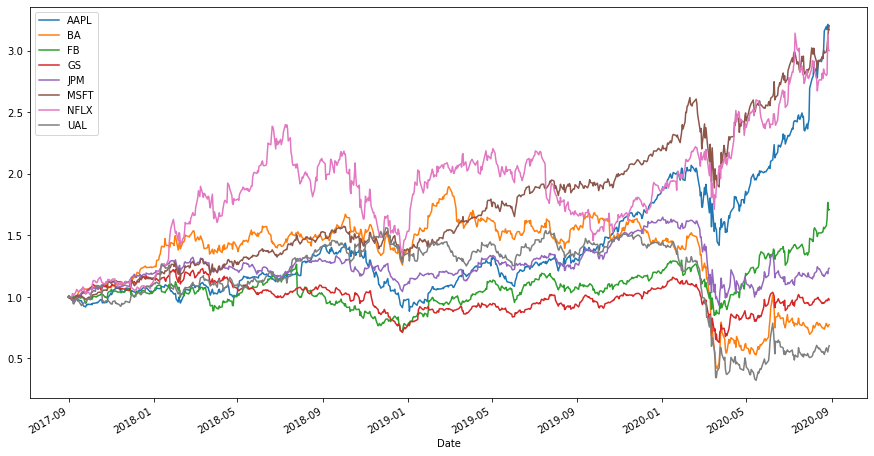

In [173]:
# Now, let's plot the cumulative daily return graph

# These are the standard plotting graph method
cum_daily_return.plot(figsize = (15,8))
plt.legend(loc = "upper left")

# 5:

In [174]:
# Now, let's visualise the daily percentage changes for Goldman Sachs

# Now, let's bring out the daily percentage change data for memory purposes
daily_pct_change

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31  0.000e+00  0.000  0.000e+00  0.000  0.000  0.000  0.000e+00  0.000
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[754 rows x 8 columns]

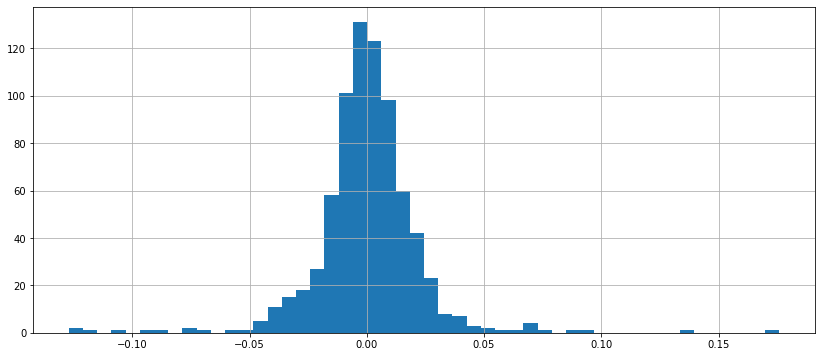

In [175]:
# OK, now we just use the method we used before to calculate the daily percentage change for Goldman Sachs
# Nothign different

gs = daily_pct_change["GS"]

# Now, we plot the histogram using the usual plotting method
gs.hist(bins = 50, figsize = (14, 6))

In [177]:
# Describe the data to get the data description

gs.describe()

count    7.540e+02
mean     2.151e-04
std      2.228e-02
min     -1.271e-01
25%     -8.652e-03
50%      1.414e-04
75%      9.861e-03
max      1.758e-01
Name: GS, dtype: float64

In [178]:
# The standard percentiles are 25% 50% and 75%, 
# If you want to change the percentiles, you would need to change it this way:

gs.describe(percentiles = [0.025, 0.5, 0.975])

count    7.540e+02
mean     2.151e-04
std      2.228e-02
min     -1.271e-01
2.5%    -4.053e-02
50%      1.414e-04
97.5%    3.926e-02
max      1.758e-01
Name: GS, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A26DABAC0>,
      dtype=object)

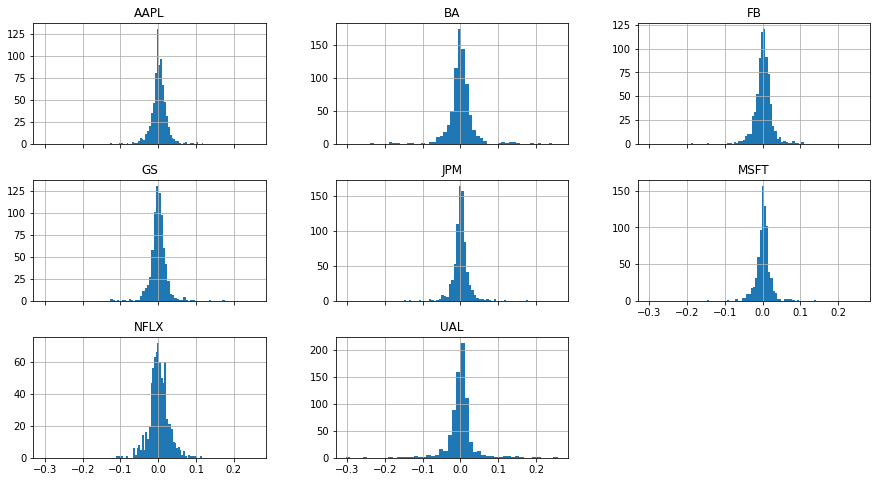

In [179]:
# Now, let's show all the histogram for al our Stocks in our data set

daily_pct_change.hist(bins = 50, sharex = True, figsize = (15, 8)) # Sharex means using the same x axis

# 6:

In [180]:
# In order to do QQ plots, we need to first import scipy.stats as stats

import scipy.stats as stats

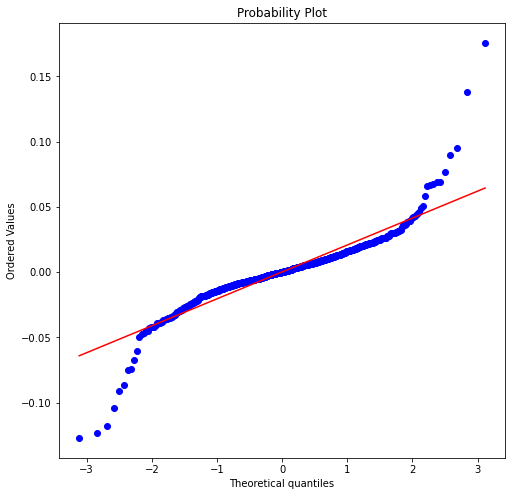

<Figure size 432x288 with 0 Axes>

In [181]:
# We make f equal to the figure sizing function
f = plt.figure(figsize = (8, 8))

# Then, we make ax equal to add_subplot() function
ax = f.add_subplot(111)

# Then, using stats,probplot() function, we include our variables,
# Goldman Sachs as the data, distribution = normal, and plot with = ax)
stats.probplot(gs, dist = "norm", plot = ax)
plt.show()
plt.savefig("QQ.png", dpi = 300)

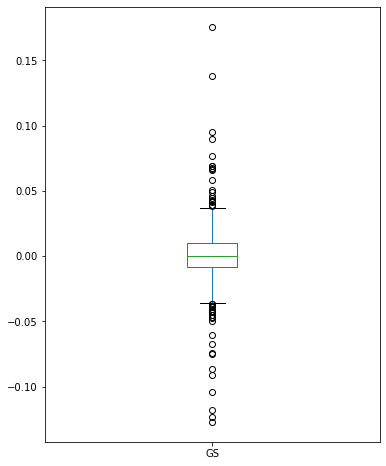

In [182]:
# We now can make boxplot, using .plot() function with kind = box in it

daily_pct_change[["GS"]].plot(kind = "box", figsize = (6,8))

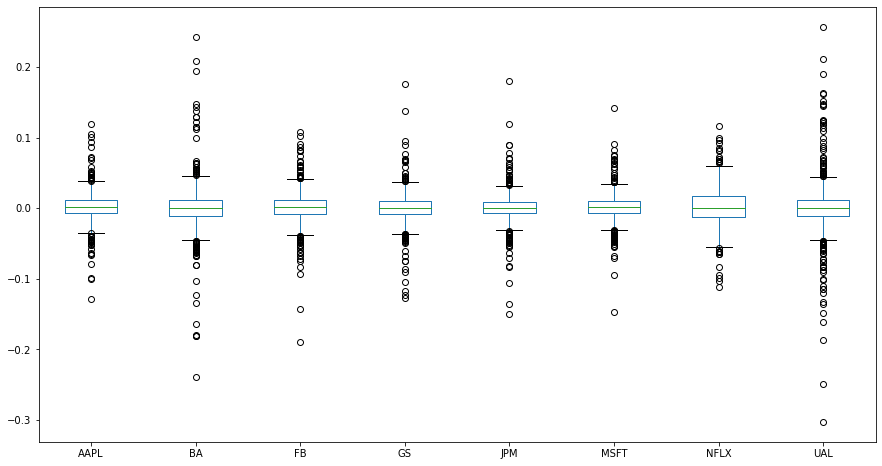

In [184]:
# Now, we can make boxplot for all the stocks in our data

daily_pct_change.plot(kind = "box", figsize = (15, 8))
plt.savefig("box_stock8.png", dpi = 300)

In [169]:
def make_scatter_plot(data,
                      x_stock_name,
                      y_stock_name,
                      xlim = None,
                      ylim = None):
    
    fig = plt.figure(figsize = (10, 6))
    
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name], alpha = 0.2)
    
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.autoscale(False)
    
    ax.vlines(0, -10, 10, color = "grey")
    ax.hlines(0, -10, 10, color = "grey")
    
    ax.plot((-10, 10), (-10, 10), color = "red") # Perfect Correlation Benchmark :) for an Effective Comparison
    
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

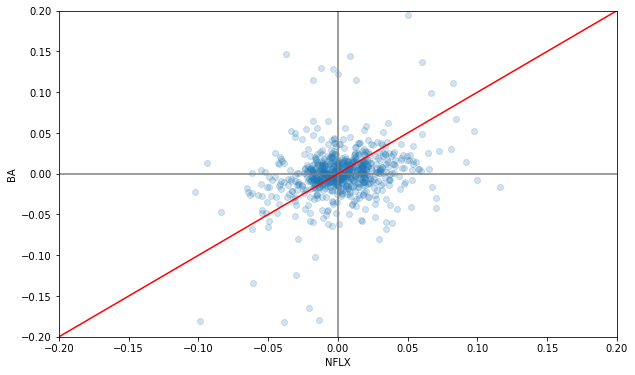

In [170]:
make_scatter_plot(daily_pct_change, "NFLX", "BA", xlim = (-0.20, 0.20), ylim = (-0.20, 0.20))

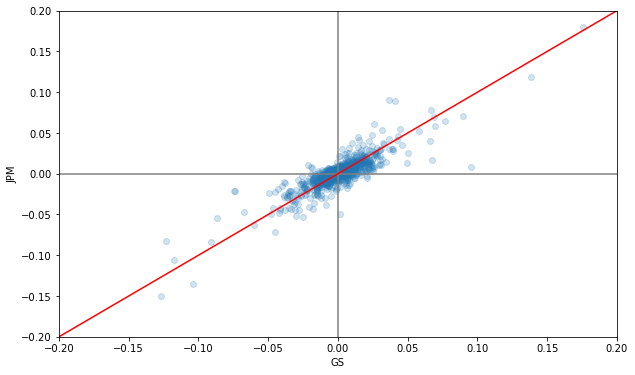

In [171]:
make_scatter_plot(daily_pct_change, "GS", "JPM", xlim = (-0.20, 0.20), ylim = (-0.20, 0.20))

# 5:

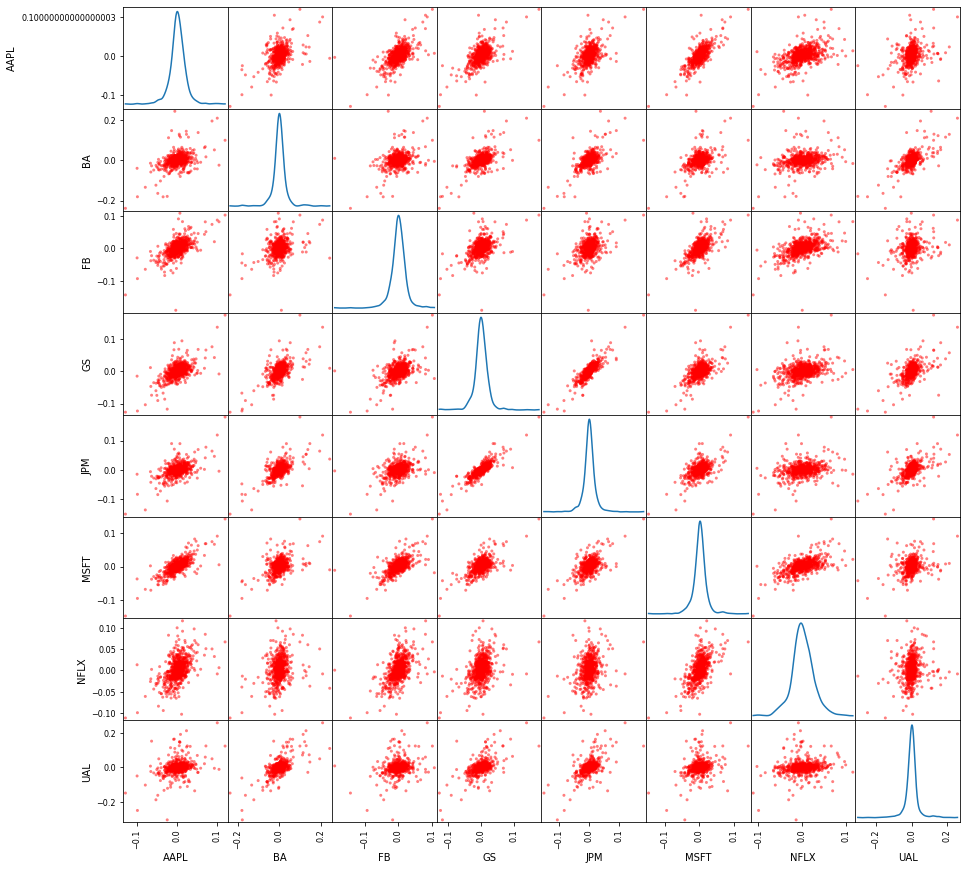

In [203]:
# Kernel Density Estimation
# pd.scatter_matrix() is deprecated :)

pd.plotting.scatter_matrix(daily_pct_change, diagonal = "kde", alpha = 0.5, figsize = (15,15), color = "red")
plt.savefig("scatter_kde.png", bbox_inches = "tight", dpi = 300)

# 6:


In [204]:
# Now, let's work with Moving Averages, first again, let's check back out data to refresh our memory

daily_close_px

Ticker         AAPL       BA      FB       GS      JPM     MSFT    NFLX    UAL
Date                                                                          
2017-08-31   39.381  227.173  171.97  211.642   83.429   71.496  174.71  61.96
2017-09-01   39.393  227.808  172.02  213.666   84.172   70.702  174.74  62.43
2017-09-05   38.920  224.652  170.72  206.004   82.162   70.387  174.52  61.10
2017-09-06   38.880  222.396  172.09  206.998   82.713   70.186  179.25  60.33
...             ...      ...     ...      ...      ...      ...     ...    ...
2020-08-25  124.825  174.730  280.82  204.760  100.500  216.470  490.58  35.22
2020-08-26  126.522  171.900  303.91  205.973   99.090  221.150  547.53  34.25
2020-08-27  125.010  174.200  293.22  208.885  102.350  226.580  526.27  36.22
2020-08-28  124.808  175.800  293.66  206.460  102.770  228.910  523.89  37.34

[754 rows x 8 columns]

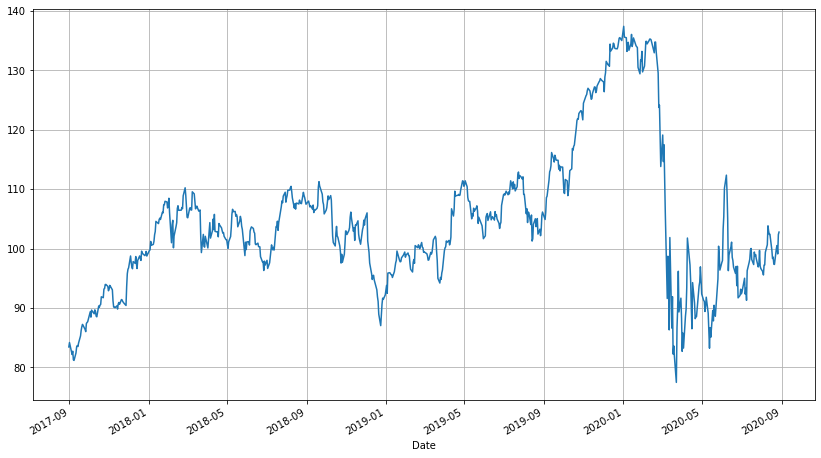

In [208]:
# This is a simple plot for JPM daily closing data

jpm = daily_close_px["JPM"]
jpm.plot(figsize = (14, 8))

# plt.grid to plot grid instead of plot
plt.grid()

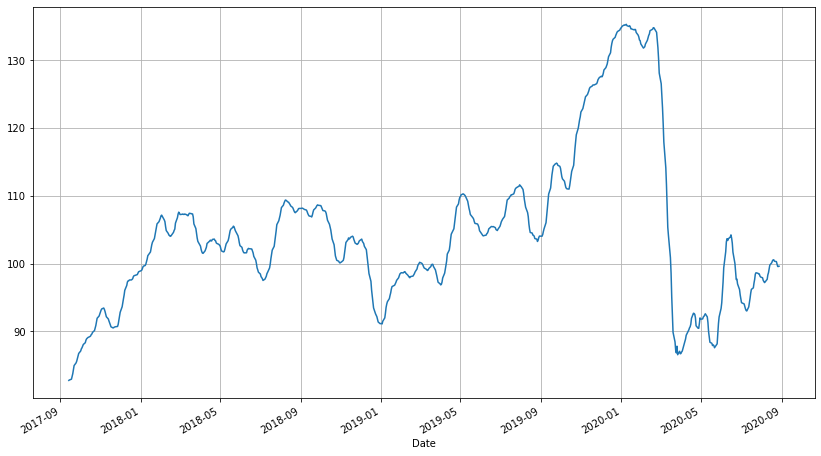

In [223]:
# Now, we want to make a moving average (MA) of 10 terms, MA(10)
# we do that by using .rolling(10).mean() function
# Size of the moving window. 
# This is the number of observations used for calculating the statistic. 
# Each window will be a fixed size.

jpm.rolling(10).mean().plot(figsize = (14, 8))
plt.grid()

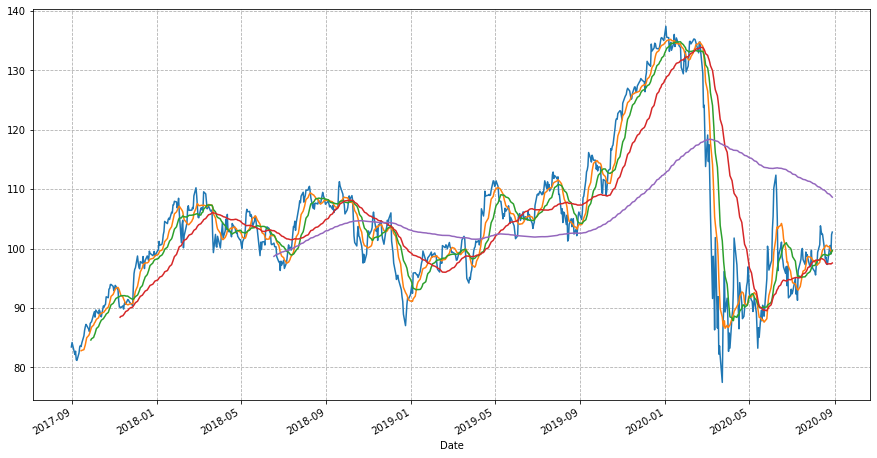

In [209]:
# Now, we want to plot mutiple MA, we do this by:

jpm.plot(figsize = (15, 8))
jpm.rolling(10).mean().plot(figsize = (15, 8)) # MA(10)
jpm.rolling(20).mean().plot(figsize = (15, 8)) # MA(20)
jpm.rolling(50).mean().plot(figsize = (15, 8)) # MA(50)
jpm.rolling(200).mean().plot(figsize = (15, 8)) # MA(200)
plt.grid(linestyle = "--") # Line style
plt.savefig("jpm_MAs.png", bbox_inches = "tight", dpi = 300)

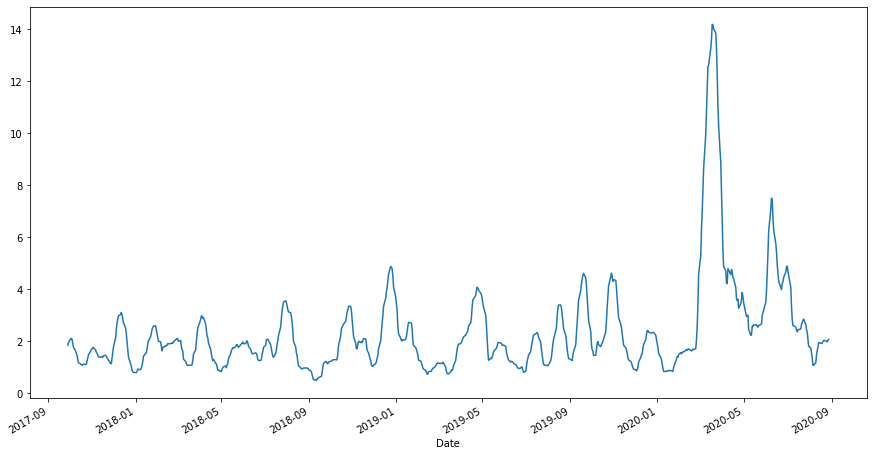

In [217]:
# Now, we calculate mean absolute deviation
# We do this by using np.fabs() function, then denote the function with (x-x.mean()).mean()

mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()

jpm.rolling(20).apply(mean_abs_dev).plot(figsize = (15, 8))

In [218]:
# Now, if we expand the above equation to just get the sample mean and moving averages

expanding_mean = lambda x: pd.rolling_mean(x, len(x), min_periods = 1)

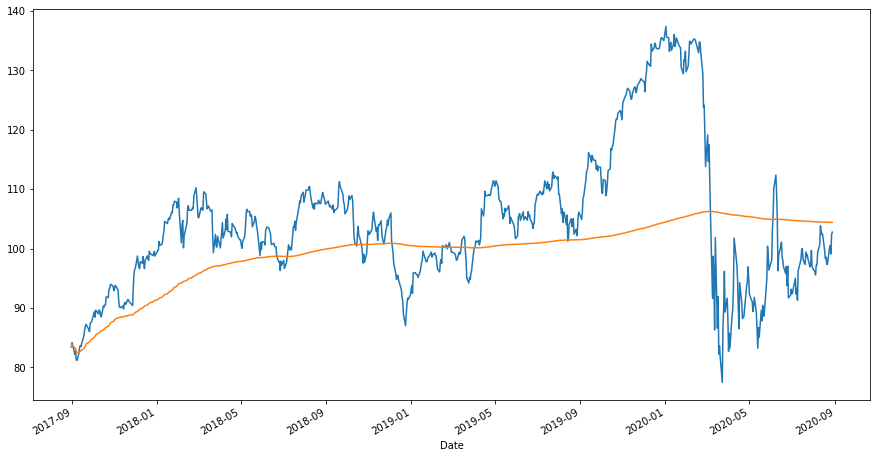

In [219]:
# We plot them

jpm.plot()
jpm.expanding().mean().plot(figsize = (15,8))

# 7:

In [193]:
# Now, we want to do volatility calculation, we make the minimum number of days to 80

min_periods = 80

In [220]:
# Let's calculate the rolling standard deviation, with 80 windows, rolling

vol = daily_pct_change.rolling(80).std() * np.sqrt(80) # np function .sqrt(80) to get variance

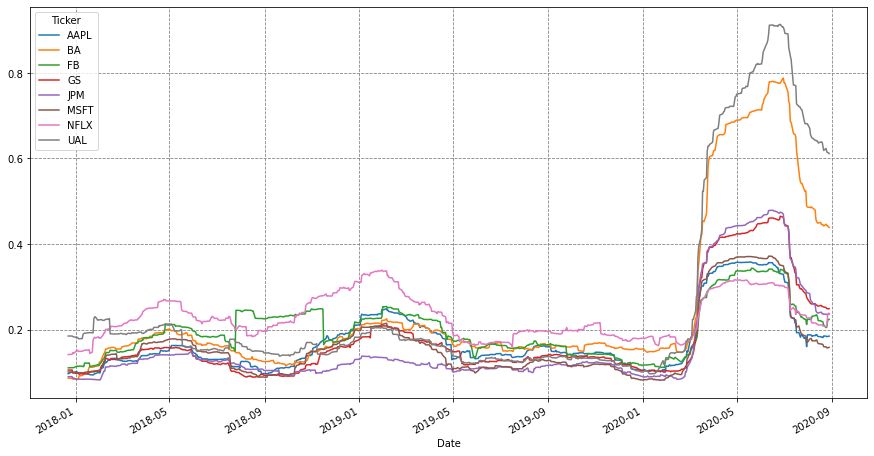

In [195]:
vol.plot(figsize = (15, 8))
plt.grid(color = "grey", linestyle = "--")

# 7:


In [222]:
# Here, we want to get rolling correlation, to do that, we need to get two data together to find their correlation
# We first get the daily close price of BA then get it the correlation of it with 20 window samples, rolling
# Then, function it with .corr with daily close price of UAL
# Then we .dropna() to remove any na values

roll_corr = daily_close_px["BA"].rolling(20).corr(daily_close_px["UAL"]).dropna()
roll_corr

Date
2017-09-28   -0.432
2017-09-29   -0.349
2017-10-02   -0.257
2017-10-03   -0.031
              ...  
2020-08-25    0.956
2020-08-26    0.953
2020-08-27    0.940
2020-08-28    0.915
Length: 735, dtype: float64

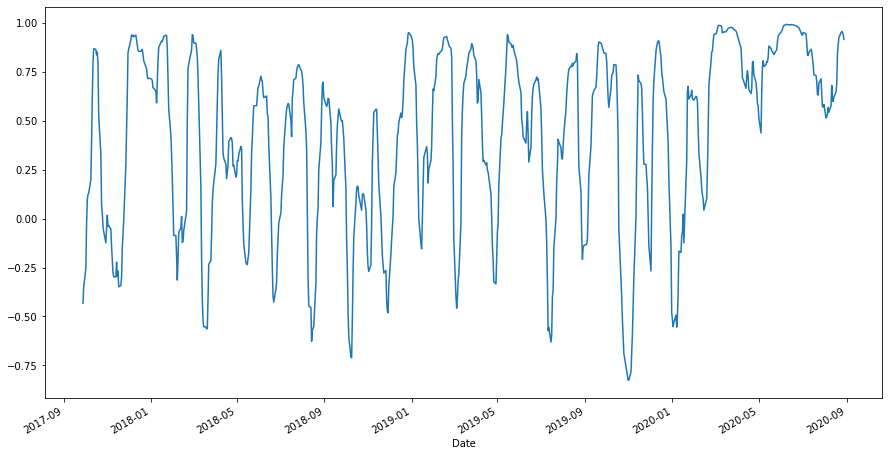

In [224]:
# We plot them here

roll_corr.plot(figsize = (15, 8))

# 8:

In [225]:
# Now, we want to work with regression
# To do that, we need to import relevant packages to work with

import statsmodels.api as sm

In [230]:
# pd.ols() is deprecated...

# This is how we create a Odinary Least Square (OLS) regression

# We do this by using sm package function .add_constant and function it to the data choice we want
# Then, using sm package .OLS function to function the data choice we want with .fit()

x = sm.add_constant(daily_pct_change["GS"])
model = sm.OLS(daily_pct_change["JPM"], x).fit()

print(model.params)
print(model.rsquared)
print(str(model.summary()))

const    3.257e-04
GS       8.313e-01
dtype: float64
0.7526207759617265
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2288.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          2.69e-230
Time:                        05:47:27   Log-Likelihood:                 2357.5
No. Observations:                 754   AIC:                            -4711.
Df Residuals:                     752   BIC:                            -4702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [228]:
for attr in dir(model):
    if not attr.startswith("_"):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid
